####  Import Libraries

In [1]:
import sys
print('Python version: {}'.format(sys.version))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import scipy as sp
print('Scipy version: {}'.format(sp.__version__))
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.14.3
pandas version: 0.23.0
matplotlib version: 2.2.2
Scipy version: 1.1.0
-------------------------


#### Load Data Modelling Libraries

In [2]:
# Common Model Algorithms
from sklearn import  svm, tree, linear_model, neighbors, naive_bayes,\
                     ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model Helper
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

#### Meet and Greet Data

 * It is important to note, more predictor variables do not make a better model, but the  right 
    variables  do.
 
 
 * It should be compared to the base model to determine if complexity truly adds value.
 
 
 * Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome.
   For this dataset, we will create a title feature to determine if it played a role in survival.
 

In [3]:
path = 'D:\\kaggle\\Titanic\\'
data_raw = pd.read_csv(path + 'train.csv')
data_val = pd.read_csv(path + 'test.csv')

# a dataset should be broken into 3 splits: train, test, and(final) validation
# the test file provided is the validation file for competition submission
# we will split the train set into train and test data in future sections
# to play with our data we will create a copy
# remember python assignment or equal passes by reference as values,
# so we use copy funciton
data1 = data_raw.copy(deep=True)
# passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

# preview data
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


##### The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)

print('Test columns with null values:\n', data_val.isnull().sum())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Clarke, Mrs. Charles V (Ada Maria Winfield)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:
    # complete missing age with median
    dataset['Age'].fillna(dataset.Age.median(), inplace=True)
    # complete embarked with mode
    dataset['Embarked'].fillna(dataset.Embarked.mode()[0], inplace=True)
    # complete missing fare with median
    dataset['Fare'].fillna(dataset.Fare.median(), inplace=True)
    
# delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)
    
print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())
    

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


* Feature Engineering for train and test/validation dataset

In [6]:
# CREAT: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:
    # Discrete variables
    dataset['FamilySize'] = dataset.SibSp + dataset.Parch + 1
    # initialize to yes/1 IsAlone
    dataset['IsAlone'] = 1
    # now update to no/0 if family size is greater than 1
    dataset['IsAlone'].loc[dataset.FamilySize > 1] = 0
    
    dataset['Title'] = dataset.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    # cleanup rare title names
    stat_min = 10
    title_names = (data1['Title'].value_counts() < stat_min)
    # apply and lambda functions are quick and dirty code to find and replace
    # with fewer lines of code:
    data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    print(data1.Title.value_counts())
    print('-'*10)
    
    # preview data again
    data1.info()
    data_val.info()
    data1.sample(10)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-

In [7]:
data1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,C,2,0,Misc,"(31.0, 512.329]","(48.0, 64.0]"
364,0,3,"O'Brien, Mr. Thomas",male,28.0,1,0,15.5000,Q,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
514,0,3,"Coleff, Mr. Satio",male,24.0,0,0,7.4958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
616,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,14.4000,S,3,0,Mr,"(7.91, 14.454]","(32.0, 48.0]"
58,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,27.7500,S,4,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
442,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,7.7750,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
576,1,2,"Garside, Miss. Ethel",female,34.0,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(32.0, 48.0]"
635,1,2,"Davis, Miss. Mary",female,28.0,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
411,0,3,"Hart, Mr. Henry",male,28.0,0,0,6.8583,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
707,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,26.2875,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"


* Convert Formats

In [8]:
# CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

# code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# define y variable aka(also known as) target/outcome
Target = ['Survived']

# define x variables for original features aka feature selection
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy, '\n')

# define x variable for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

# define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()
    

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


* Double Check Cleaned Data

In [9]:
print('Train columns with null values: \n', data1.isnull().sum())
print('-'*10)
print(data1.info())
print('-'*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Clarke, Mrs. Charles V (Ada Maria Winfield)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Split Training and Testing Data

* regression:    a continuous target variable 
* classification: a discrete target variable
* esp. logistic regression is really a classification algorithm.

In [10]:
# split train and test data with function defaults
# random_state -> seed or control random number generator
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(
    data1[data1_x_calc], data1[Target], random_state=0)

train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(
    data1[data1_x_bin], data1[Target], random_state=0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(
    data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print('Data1 Shape: {}'.format(data1.shape))
print('Train1 Shape: {}'.format(train1_x.shape))
print('Test1 Shape: {}'.format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


#### Perform Exploratory Analysis with Statistics

In [11]:
# Discrete Variable Correlation by Survival using
# group by aka pivot table
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
# using crosstab 用于统计分组频率
print(pd.crosstab(data1.Title, data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303

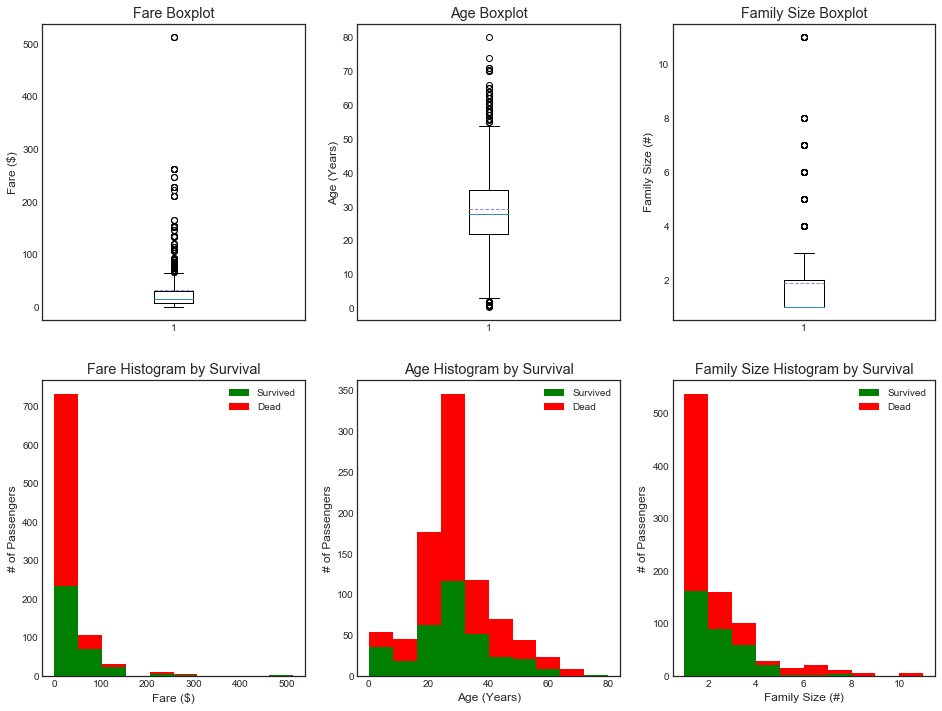

In [12]:
# IMPORTANT: Intentionally plotted different ways for learning purposes only.

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1.Fare, showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1.Age, showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1.FamilySize, showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],
        stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
        stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

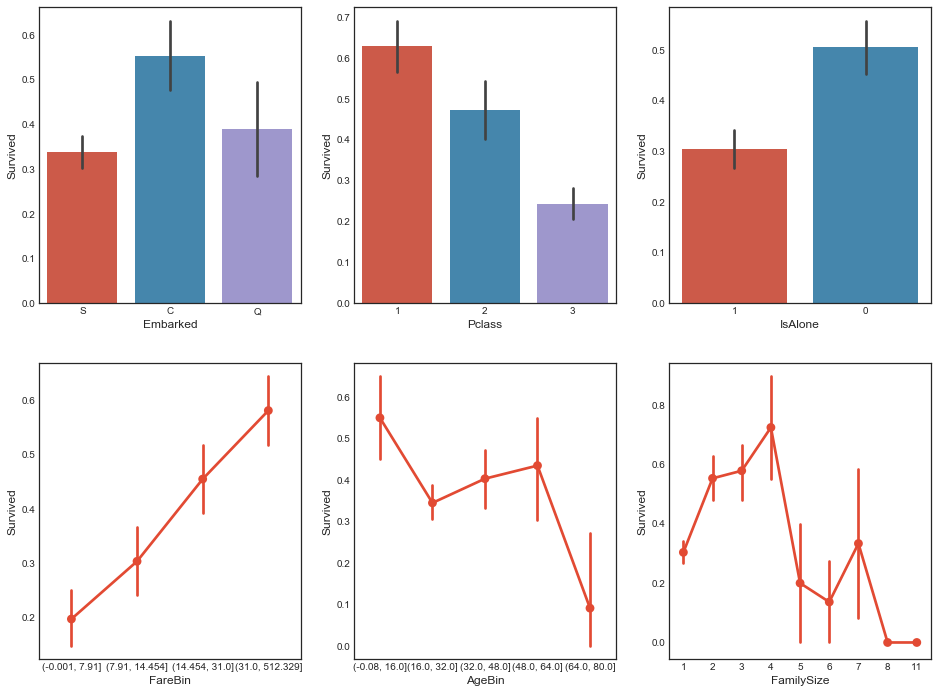

In [13]:
fig, saxis = plt.subplots(2, 3, figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1, 0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1,0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

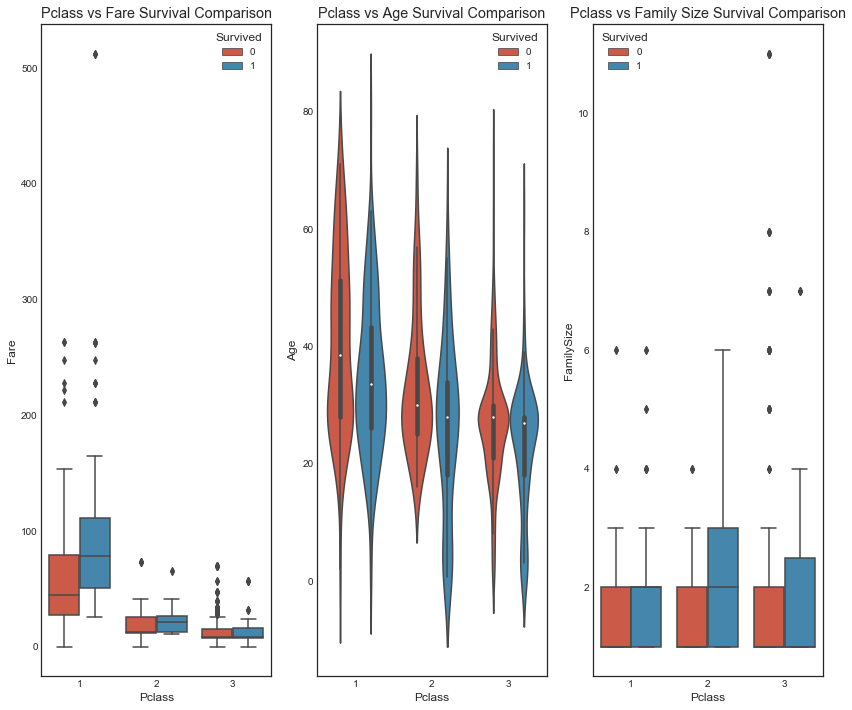

In [14]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparision')

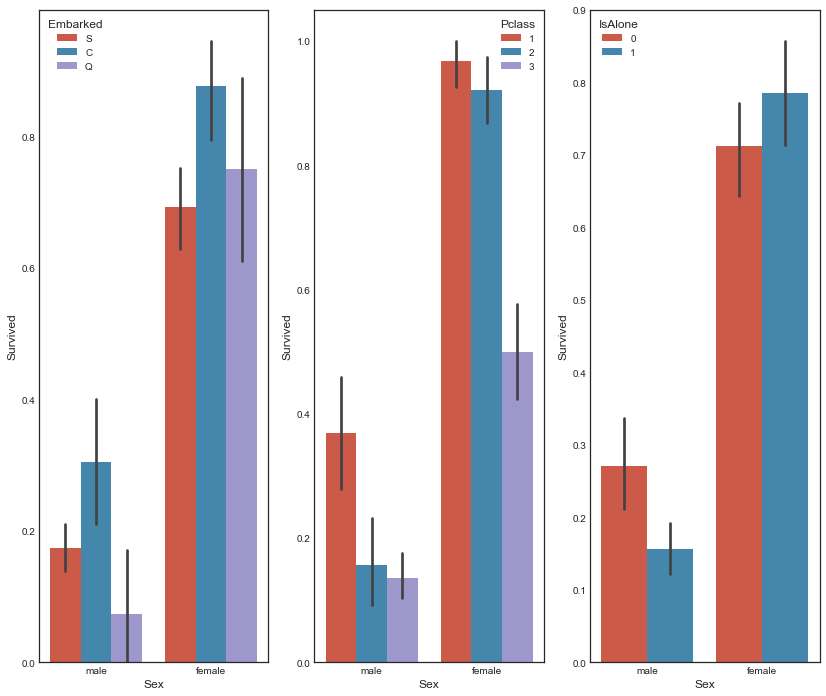

In [15]:
fig, qaxis = plt.subplots(1, 3, figsize=(14,12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=data1, ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparision')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data1, ax=qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparision')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=data1, ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparision')

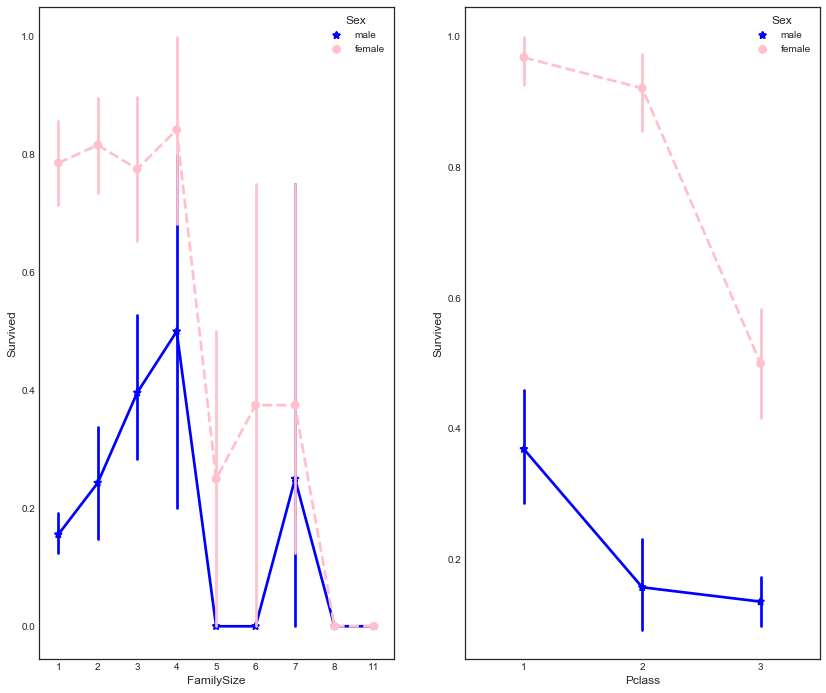

In [16]:
# more side-by-side comparision
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14,12))

# how does family size factor with sex & survival compare
sns.pointplot(x='FamilySize', y='Survived', hue='Sex', data=data1,
             palette={'male': 'blue', 'female':'pink'},
             markers=['*', 'o'], linestyles=['-', '--'],
             ax=maxis1)

# how does class factor with sex & survival compare
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data1,
             palette={'male': 'blue', 'female':'pink'},
             markers=['*', 'o'], linestyles=['-', '--'],
             ax=maxis2)


D:\myprograms\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\myprograms\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


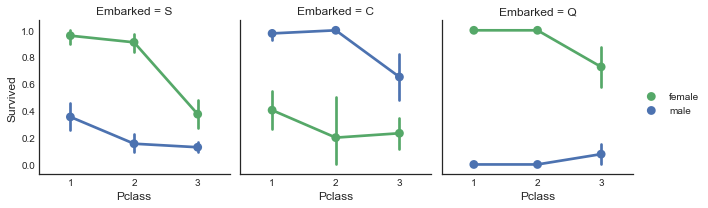

In [17]:
# how does embark port factor with class, sex, and survival compare
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()

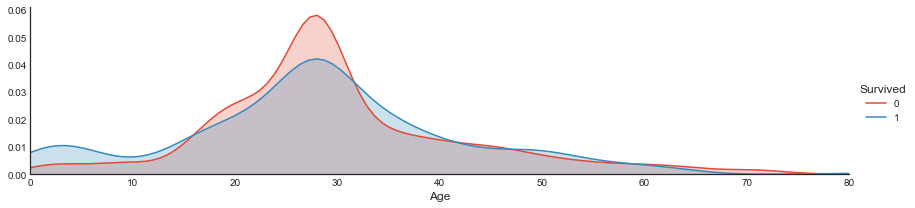

In [18]:
# plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(data1, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

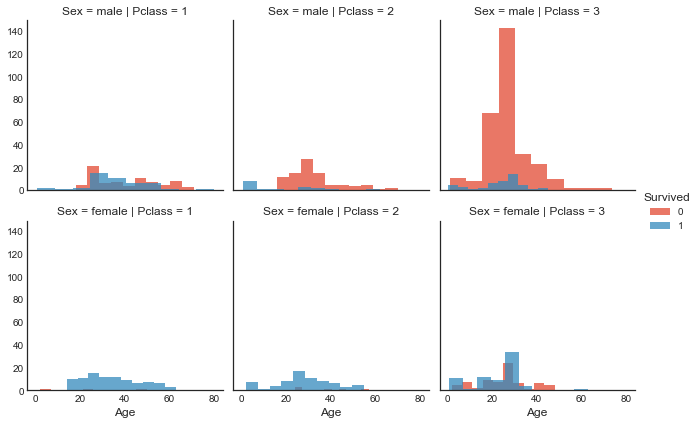

In [19]:
# histogram comparision of sex , class and age by survival
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

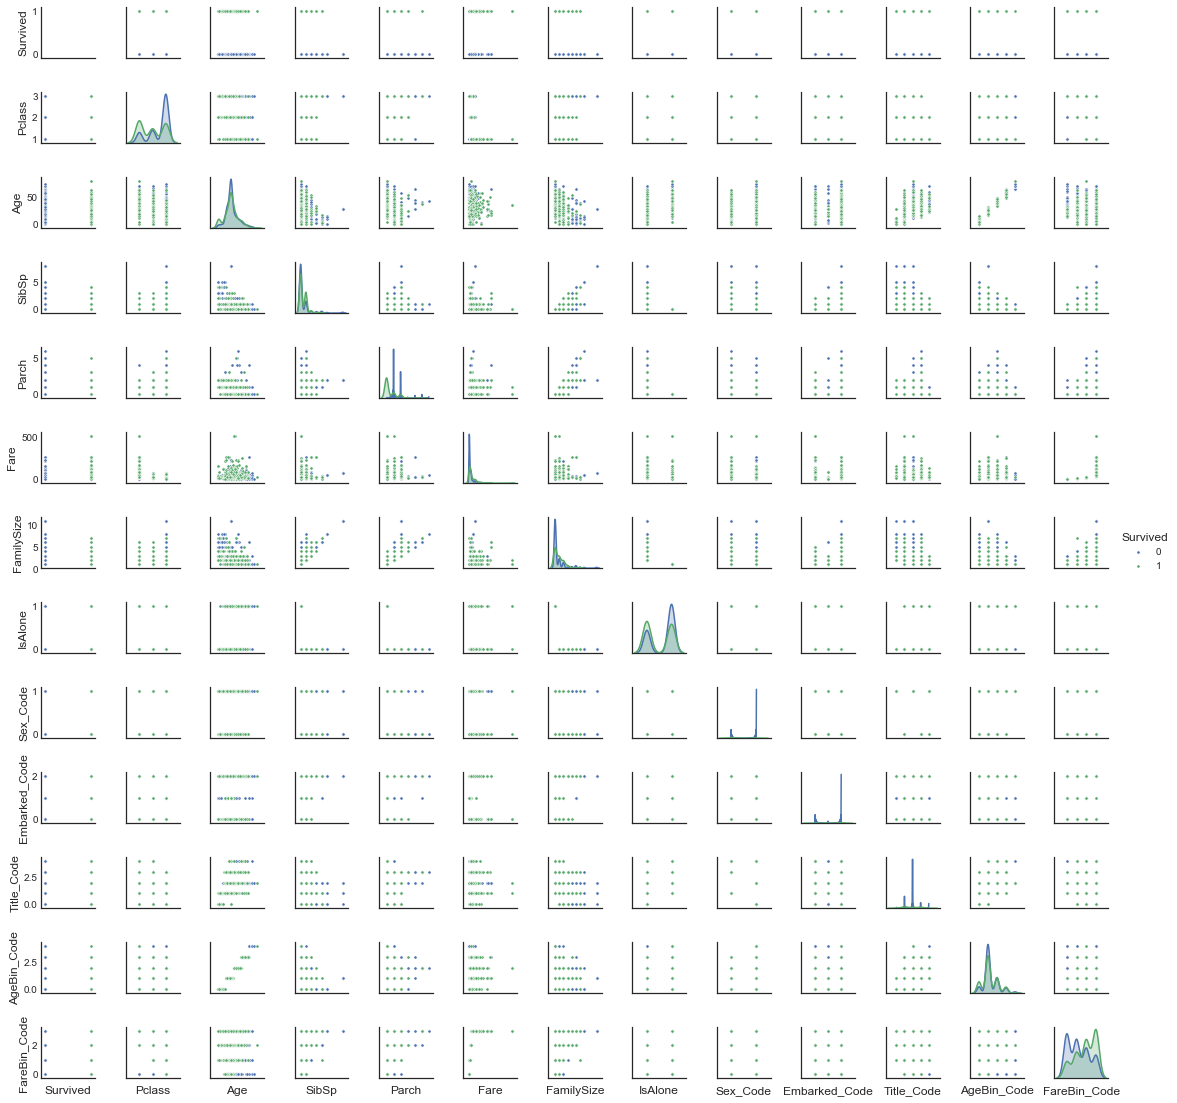

In [20]:
# pair plots of entire dataset
pp = sns.pairplot(data1, hue='Survived', palette='deep', size=1.2,
                 diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

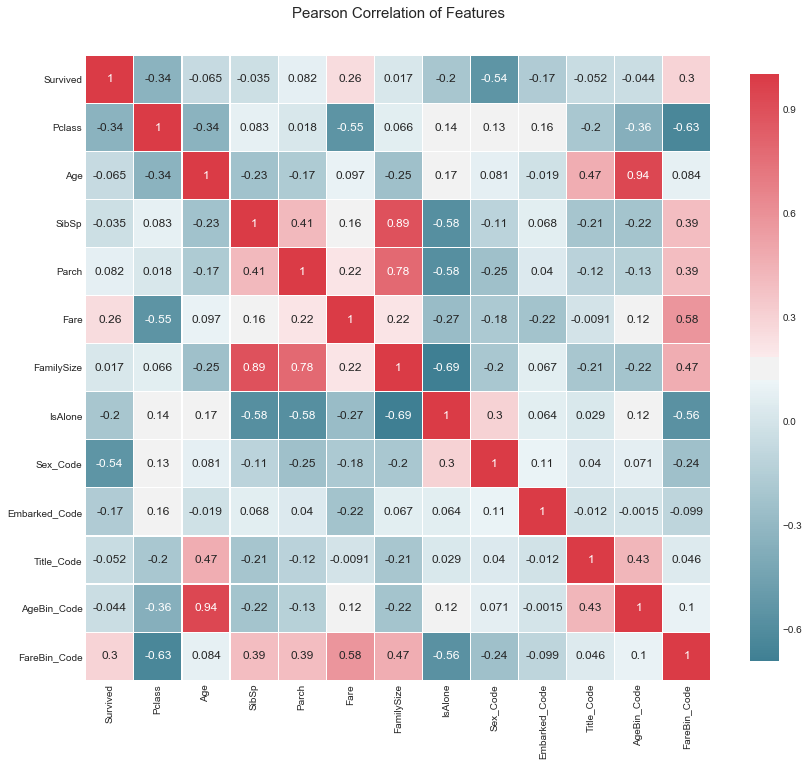

In [21]:
# correlation heatmap of dataset
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220,10,as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        linewidths=.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12})
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    

correlation_heatmap(data1)

#### Model Data

* How to Choose a Machine Learning Algorithm


* No Free Lunch Theorem(NFLT)
  There is no super algorithm, that works best in all situations, for all datasets.
  So the best approach is to try multiple MLAs, tune them, and compare them for your
  specific scenario.
  
 
 * for beginner: Trees, Bagging, Random Forests, and Boosting.

In [22]:
# Machine Learning Algorithm Selection and Initialization
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Navies Bayes
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # xgboost
    XGBClassifier()
    ]

# split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

# create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
              'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# create table to compare MLA predictions
MLA_predict = data1[Target]

# index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    # if this is a non-bias random sample, then +/- 3 standard deviations (std) from the mean,
    # should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    # save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index += 1

# print and sort table
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)

MLA_compare

D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\myprograms\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\myprograms\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\myprograms\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\myprograms\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.827239,0.0430788,0.0376021
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.839139,0.826866,0.0439856,0.0311017
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.836517,0.826119,0.0470149,0.035402
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892135,0.823134,0.0772631,0.0117007
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.867041,0.822015,0.0513097,0.0476027
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.821269,0.0589044,0.0016001
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.849625,0.819776,0.0631347,0.00200014
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.819403,0.061557,0.0103006
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.817164,0.0367873,0.00160015
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890637,0.811567,0.0660827,0.0120007


Text(0,0.5,'Algorithm')

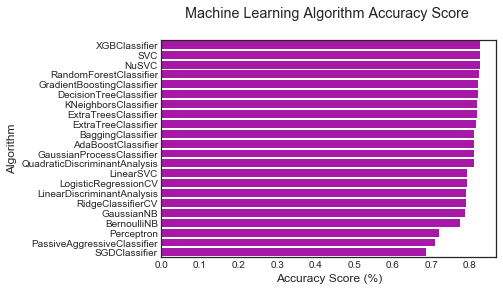

In [23]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

#### Evaluate Model Performance

* Determine a Baseline Accuracy


* Before we decide how-to make our model better, let's determine if our model is even
  worth keeping.

In [24]:
# IMPORTANT: This is a handmade model for learning purposes only
# However, it is possible to create your own predictive model without a fancy algorithm
for index, row in data1.iterrows():
    # random number generator
    if random.random() > .5:  # random float x, 0.0 <= x < 1.0
        data1.set_value(index, 'Random_Predict', 1) # predict survived/1
    else:
        data1.set_value(index, 'Random_Predict', 0) # predict died/0

# score random guess of survival. 
# Use shorcut 1 = Right Guess and 0 = Wrong Guess
# the mean of the column will then equal the accuracy
data1['Random_Score'] = 0  # assume prediction wrong
data1.loc[(data1.Survived==data1.Random_Predict), 'Random_Score'] = 1 # set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1.Random_Score.mean()*100))
# we can also use sk-learn's accuracy_score function to save us a few lines of code
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(
        data1.Survived, data1.Random_Predict)*100))

Coin Flip Model Accuracy: 55.33%
Coin Flip Model Accuracy w/SciKit: 55.33%


In [25]:
# group by or pivot table
pivot_female = data1[data1.Sex=='female'].groupby(
    ['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n', pivot_female)

pivot_male = data1[data1.Sex=='male'].groupby(
    ['Sex', 'Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n', pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [26]:
# handmade data model using brain power
def mytree(df):
    
    # initialize table to store predictions
    Model = pd.DataFrame(data={'Predict': []})
    male_title = ['Master'] # survived titles
    
    for index, row in df.iterrows():
        
        # Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0
        
        # Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex']=='female'):
            Model.loc[index, 'Predict'] = 1
        
        # Question 3A Female - Class and Question 4 Embarked gain minimum infomation
        
        # Question 5B Female - FairBin; set anything less than .5 in 
        # female node decision tree back to 0
        if ((df.loc[index, 'Sex']=='female') &
            (df.loc[index, 'Pclass'] == 3) &
            (df.loc[index, 'Embarked'] == 'S') &
            (df.loc[index, 'Fare']>8)):
                Model.loc[index, 'Predict'] = 0
        
        # Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex']=='male') &
            (df.loc[index, 'Title'] in male_title)):
                Model.loc['index', 'Predict'] = 1
    return Model

# model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Predict Score: {:.2f}%\n'.format(
    metrics.accuracy_score(data1.Survived, Tree_Predict)*100))

print(metrics.classification_report(data1.Survived, Tree_Predict))

Decision Tree Model Accuracy/Predict Score: 81.37%

             precision    recall  f1-score   support

          0       0.80      0.94      0.86       549
          1       0.86      0.62      0.72       342

avg / total       0.82      0.81      0.81       891



Confusion matrix, without normalization
[[514  35]
 [131 211]]
Normalized confusion matrix
[[0.94 0.06]
 [0.38 0.62]]


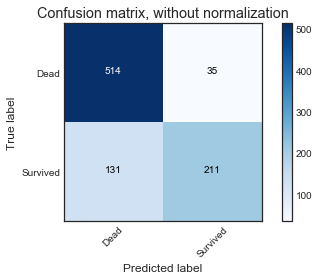

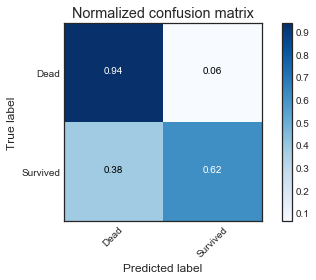

In [27]:
# plot Accuracy Summary
import itertools
'''
This function prints and plots the confusion matrix.
Normalization can be applied by setting 'normalize=True'
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                         title = 'Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
    
cnf_matrix = metrics.confusion_matrix(data1.Survived, Tree_Predict)
np.set_printoptions(precision=2)
class_names = ['Dead', 'Survived']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                     title='Normalized confusion matrix')

* TP:真正例数目， FP:假正例数目； precision = TP/(TP + FP)
* TN:真反例数目， FN:假反例数目； recall = TP/(TP + FN)
* confusion matrix likes as follows:
*  TN  FP   
*  FN  TP

* Model Performance with Cross-Validation(CV)


* It is important we use a different subset for train data to build our model and test data to evaluate our model.

In [28]:
# base model
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv=cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*100*3))

print('-'*10)

# tune hyper-parameters
param_grid = {
            # scoring methodology, two supported formulas for calculating information gain
            'criterion': ['gini', 'entropy'],
             'max_depth': [2, 4, 6, 8, 10, None],
             'random_state': [0]}

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                         param_grid=param_grid, scoring='roc_auc', cv=cv_split)

tune_model.fit(data1[data1_x_bin], data1[Target])

print('AFTER DT Parameters: ', tune_model.best_params_)
print('AFTER DT Training w/bin score mean: {:.2f}'.format(
        tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(
        tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}'.format(
        tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)



BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.05
BEFORE DT Test w/bin score 3*std: +/- 5.70
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.41
AFTER DT Test w/bin score mean: 87.63
AFTER DT Test w/bin score 3*std: +/- 6.44
----------


##### Tune Model with Feature Selection

* More predictor variables do not make a better model, but the right predictors do.


* Programming is all about 'borrowing' code, because knife sharpens knife.

In [29]:
# base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape)
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)
print('BEFORE DT RFE Training w/bin score mean: {:.2f}'.format(
        base_results['train_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score mean: {:.2f}'.format(
        base_results['test_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}'.format(
        base_results['test_score'].std()*100*3))
print('-'*10)

# feature selection
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])


# transform x&y to reduced features and fit new model
# alternative； can use pipeline to reduce fit and transform steps
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv=cv_split)

print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape)
print('AFTER DT RFE Training Columns New: ', X_rfe)

print('AFTER DT RFE Training w/bin score mean: {:.2f}'.format(
        rfe_results['train_score'].mean()*100))
print('AFTER DT RFE Test w/bin score mean: {:.2f}'.format(
        rfe_results['test_score'].mean()*100))
print('AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}'.format(
        rfe_results['test_score'].std()*3*100))
print('-'*10)

# tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                             param_grid=param_grid, scoring='roc_auc',
                                             cv=cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print('AFTER DT RFE Tuned Training w/bin score mean: {:.2f}'.format(
        rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score mean: {:.2f}'.format(
        rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}'.format(
        rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*3*100))
print('-'*10)




BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.05
BEFORE DT RFE Test w/bin score 3*std: +/- 5.70
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 82.99
AFTER DT RFE Test w/bin score 3*std: +/- 6.28
----------


D:\myprograms\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.43
AFTER DT RFE Tuned Test w/bin score mean: 87.44
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.69
----------


#### Validate and Implement

In [41]:
type(MLA_predict)

pandas.core.frame.DataFrame

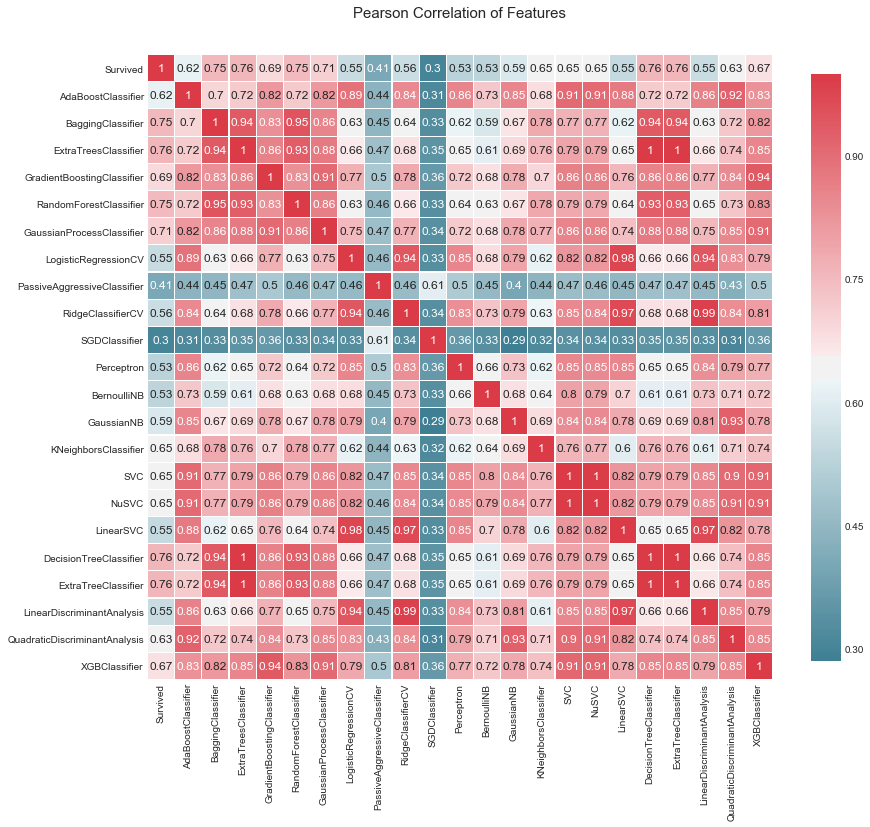

In [30]:
# compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
# there are some 1's, but enough blues and light reds to create a 'super algorithm' by combining them
correlation_heatmap(MLA_predict)

In [31]:
# why choose one model, when you can pick them all with voting classifier
# removed models who attribute 'predict_proba' required for vote classifier and 
# models with a 1.0 correlation to another model
import warnings
warnings.filterwarnings('ignore')
vote_est = [
    # Emsemble Methods
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    # Gaussian Processes
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    # GLM
    ('lr', linear_model.LogisticRegressionCV()),
    # Navies Bayes
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('svc', svm.SVC(probability=True)),
    ('xgb', XGBClassifier())
]

# Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv=cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print('Hard Voting Training w/bin score mean: {:.2f}'.format(
        vote_hard_cv['train_score'].mean()*100))
print('Hard Voting Test w/bin score mean: {:.2f}'.format(
        vote_hard_cv['test_score'].mean()*100))
print('Hard Voting Test w/bin score 3*std: +/- {:.2f}'.format(
        vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

# Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv=cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print('Soft Voting Training w/bin score mean: {:.2f}'.format(
        vote_soft_cv['train_score'].mean()*100))
print('Soft Voting Test w/bin score mean: {:.2f}'.format(
        vote_soft_cv['test_score'].mean()*100))
print('Soft Voting Test w/bin score 3*std: +/- {:.2f}'.format(
        vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Hard Voting Training w/bin score mean: 86.48
Hard Voting Test w/bin score mean: 82.72
Hard Voting Test w/bin score 3*std: +/- 4.64
----------


D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\myprograms\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Soft Voting Training w/bin score mean: 87.19
Soft Voting Test w/bin score mean: 82.61
Soft Voting Test w/bin score 3*std: +/- 4.40
----------


In [32]:

# Warning: Running is very computational intensive and time expensive
# Code is written for experimental/developmental purposes and not production ready!


# Hyperparameter Tune with GridSearchCV
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
    [{
        # AdaBoostClassifier
        'n_estimators': grid_n_estimator,
        'learning_rate': grid_learn,
        'random_state':grid_seed
    }],
    
    [{
        # BaggingClassifier
        'n_estimators': grid_n_estimator,
        'max_samples': grid_ratio,
        'random_state': grid_seed
    }],
    
    [{
        # ExtraTreesClassifier
        'n_estimators': grid_n_estimator,
        'criterion': grid_criterion,
        'max_depth': grid_max_depth,
        'random_state': grid_seed
    }],
    
    [{
        # GradientBoostingClassifier
        'learning_rate': [.05],
        'n_estimators': [300],
        'max_depth': grid_max_depth,
        'random_state': grid_seed
    }],
    
    [{
        # RandomForestClassifier
        'n_estimators': grid_n_estimator,
        'criterion': grid_criterion,
        'max_depth': grid_max_depth,
        'oob_score': [True],
        'random_state': grid_seed
    }],
    
    [{
        # GaussianProcessClassifier
        'max_iter_predict': grid_n_estimator,
        'random_state': grid_seed
    }],
    
    [{
        # LogisticRegressionCV
        'fit_intercept': grid_bool,
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'random_state': grid_seed
    }],
    
    [{
        # BernoulliNB
        'alpha': grid_ratio
    }],
    
    [{}],
    
    [{
        # KNeighborsClassifier
        'n_neighbors': [1,2,3,4,5,6,7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }],
    
    [{
        # SVC
        'C': [1,2,3,4,5],
        'gamma': grid_ratio,
        'decision_function_shape': ['ovo', 'ovr'],
        'probability': [True],
        'random_state': grid_seed
    }],
    
    [{
        # XGBClassifier
        'learning_rate': grid_learn,
        'max_depth': [1,2,4,6,8,10],
        'n_estimators': grid_n_estimator,
        'seed': grid_seed
    }]
]



start_total = time.perf_counter()

for clf, param in zip(vote_est, grid_param):
    start = time.perf_counter()
    best_search = model_selection.GridSearchCV(estimator=clf[1], param_grid=param,
                                              cv=cv_split, scoring='roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start_total
    
    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds'.format(
            clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)
    
run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(
         run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 0} with a runtime of 28.13 seconds
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 54.11 seconds
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with a runtime of 111.54 seconds
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 142.05 seconds
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50, 'oob_score': True, 'random_state': 0} with a runtime of 208.90 seconds
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 218.49 seconds
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 

In [33]:
# Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin],
                                              data1[Target], cv=cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv=cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print('Hard Voting w/Tuned Hyperparmeters Training w/bin score mean: {:.2f}'.format(
        grid_hard_cv['train_score'].mean()*100))
print('Hard Voting w/Tuned Hyperparmeters Test w/bin score mean: {:.2f}'.format(
        grid_hard_cv['test_score'].mean()*100))
print('Hard Voting w/Tuned Hyperparmeters Test w/bin score 3*std: +/- {:.2f}'.format(
        grid_hard_cv['test_score'].std()*3*100))
print('-'*10)

# Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin],
                                              data1[Target], cv=cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

vote_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv=cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print('Soft Voting w/Tuned Hyperparmeters Training w/bin score mean: {:.2f}'.format(
        grid_soft_cv['train_score'].mean()*100))
print('Soft Voting w/Tuned Hyperparmeters Test w/bin score mean: {:.2f}'.format(
        grid_soft_cv['test_score'].mean()*100))
print('Soft Voting w/Tuned Hyperparmeters Test w/bin score 3*std: +/- {:.2f}'.format(
        grid_soft_cv['test_score'].std()*3*100))
print('-'*10)

Hard Voting w/Tuned Hyperparmeters Training w/bin score mean: 85.54
Hard Voting w/Tuned Hyperparmeters Test w/bin score mean: 82.24
Hard Voting w/Tuned Hyperparmeters Test w/bin score 3*std: +/- 4.48
----------
Soft Voting w/Tuned Hyperparmeters Training w/bin score mean: 85.39
Soft Voting w/Tuned Hyperparmeters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparmeters Test w/bin score 3*std: +/- 5.35
----------


In [34]:
print(data_val.info())
print('-'*10)

data_val['Survived'] = mytree(data_val).astype(int)
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])

submit = data_val[['PassengerId', 'Survived']]
print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize=True))
submit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB
None
----------
Validation Data Distribution: 


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#### Optimize and Strategize